In [1]:
import pandas as pd
df_jugadores = pd.read_csv("./data/jugadores_cebollitas.csv")
df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


In [2]:
from sklearn.cluster import KMeans

df_jugadores = pd.read_csv("./data/jugadores_cebollitas.csv")

kmeans = KMeans(n_clusters=3, random_state=42)
X = df_jugadores[["goles", "asistencias", "pases_completados (%)", "tiros_al_arco"]]
df_jugadores["cluster"] = kmeans.fit_predict(X)

df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,1
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,0
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,1
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,1


In [3]:
columns = ["goles", "asistencias", "pases_completados (%)", "tiros_al_arco"]
perfiles = df_jugadores.groupby("cluster")[columns].mean()
print(perfiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


/var/folders/km/47m43c197zb9fcqzsgpcrxq80000gq/T/ipykernel_8548/1891189426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="cluster", y = feature, data = df_jugadores, palette="pastel")


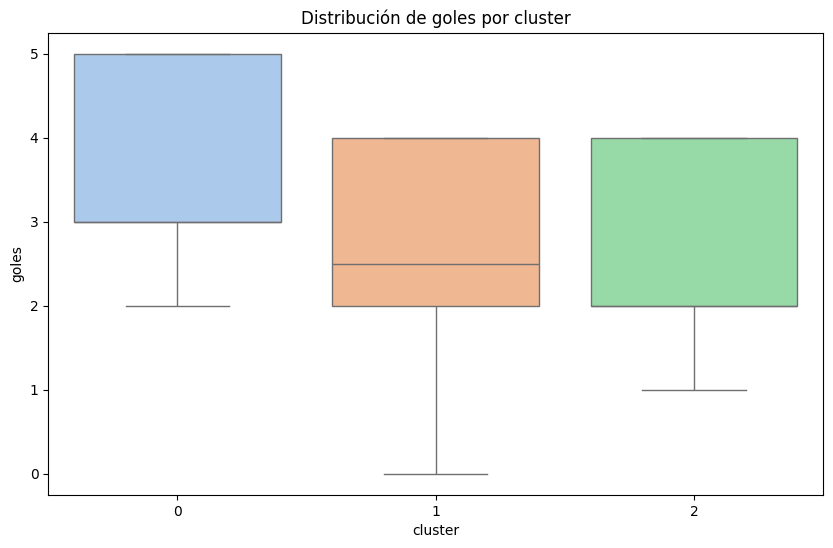

/var/folders/km/47m43c197zb9fcqzsgpcrxq80000gq/T/ipykernel_8548/1891189426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="cluster", y = feature, data = df_jugadores, palette="pastel")


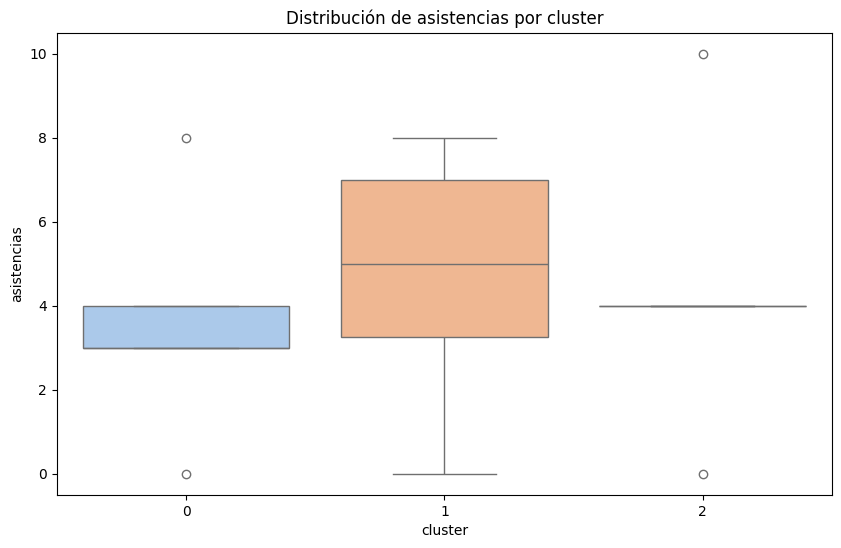

/var/folders/km/47m43c197zb9fcqzsgpcrxq80000gq/T/ipykernel_8548/1891189426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="cluster", y = feature, data = df_jugadores, palette="pastel")


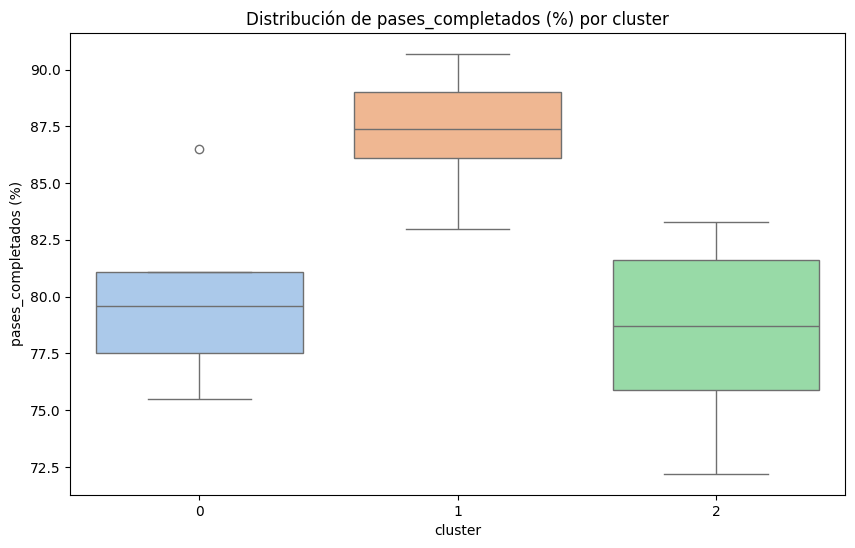

/var/folders/km/47m43c197zb9fcqzsgpcrxq80000gq/T/ipykernel_8548/1891189426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="cluster", y = feature, data = df_jugadores, palette="pastel")


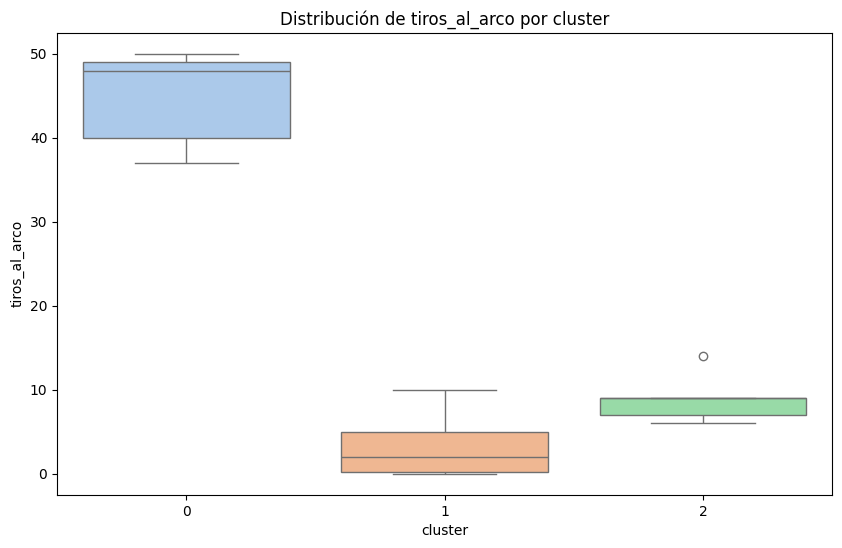

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["goles", "asistencias", "pases_completados (%)", "tiros_al_arco"]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x ="cluster", y = feature, data = df_jugadores, palette="pastel")
    plt.title(f"Distribución de {feature} por cluster")
    plt.show()

In [12]:
import ipywidgets as widgets
import IPython.display as display

cluster_selector = widgets.Dropdown(
    options=sorted(df_jugadores["cluster"].unique()),
    description="Cluster:"
)

def get_players_by_cluster(cluster):
    jugadores = df_jugadores[df_jugadores["cluster"] == cluster]
    display(jugadores[["nombre", "goles", "asistencias", "pases_completados (%)", "tiros_al_arco"]])

widgets.interactive(get_players_by_cluster, cluster=cluster_selector)

interactive(children=(Dropdown(description='Cluster:', options=(np.int32(0), np.int32(1), np.int32(2)), value=…